<a href="https://colab.research.google.com/github/anirbanghoshsbi/.github.io/blob/master/work/nse_pe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install nsepy --q

In [2]:
from nsepy import get_index_pe_history ,get_history
from datetime import date
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:

nifty_pe = get_index_pe_history(symbol="NIFTY",
                                start=date(2007,1,1),
                                end=date(2022,10,1))

In [ ]:
nifty_fut = get_history(symbol="NIFTY",
                        start=date(2007,1,1),
                        end=date(2022,10,1),
                        index=True,
                        futures=False)

In [5]:
data=pd.concat([nifty_fut,nifty_pe],axis=1)

In [6]:
data.to_csv('data.csv')

In [ ]:
data.head(2)

In [8]:
data['earnings']=data['Close']/data['P/E']

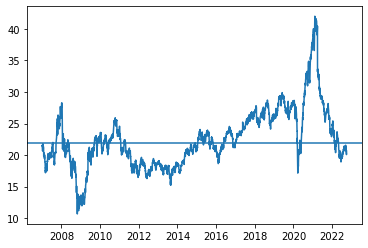

In [9]:
plt.plot(data['P/E'])
plt.axhline(y=data['P/E'].median());

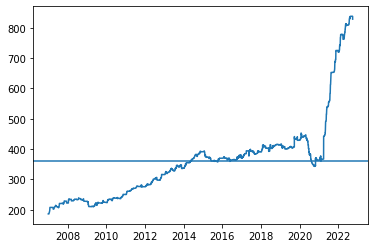

In [10]:
plt.plot(data['earnings'])#-data['earnings'].rolling(window=800).mean())
plt.axhline(y=data['earnings'].median());

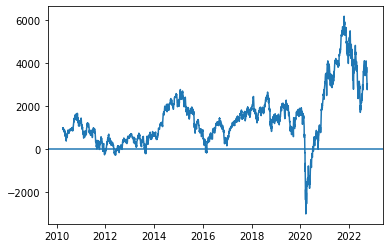

In [11]:
plt.plot(data['Close']-data['Close'].rolling(window=800).mean())
plt.axhline(y=0);

In [12]:
data['Close'].rolling(window=800).mean()[-1]

14072.315062500002

In [13]:
from sklearn import linear_model

In [14]:
reg = linear_model.LinearRegression()
reg.fit(data[['Close']], data.earnings)

LinearRegression()

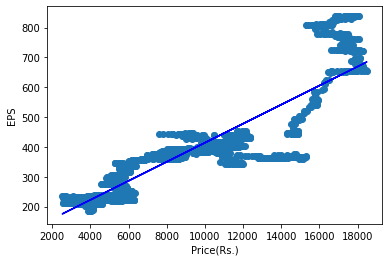

In [15]:
plt.ylabel("EPS")
plt.xlabel("Price(Rs.)")
plt.scatter(data.Close, data.earnings)
plt.plot(data.Close, reg.predict(data[['Close']]), color='blue');

In [16]:
import numpy as np
print(17000*.7)
print(reg.predict(np.array([[17000*0.7]])))

11900.0
[474.45244925]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


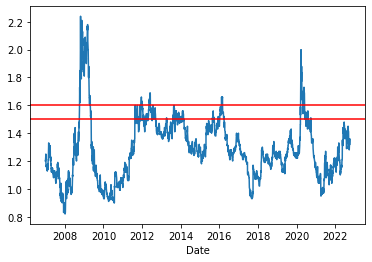

In [17]:
data['Div Yield'].plot()
plt.axhline(y=1.5,color='r');
plt.axhline(y=1.6,color='r');
